<a href="https://colab.research.google.com/gist/AdrienVansuyt/444dc3c0783100f32b6ceb46f631e068/untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduction to Monte Carlo Modeling**
Monte Carlo modelling is a simulation technique used to understand the impact of uncertainty and risk in forecasting financial models and other complex processes. It is based on the generation of numerous random scenarios to estimate the different possible values of a parameter or system.

# **Applications in finance**
In finance, the Monte Carlo model is often used to evaluate the Value at Risk (VaR) and the Conditional Value at Risk (CVaR) of an investment portfolio. VaR estimates the maximum potential loss of a portfolio at a given confidence level over a specific time period, while CVaR measures the average loss above VaR.

# **Monte Carlo Simulation code for Bitcoin (BTC)**
Here is an example of Python code to simulate the VaR and CVaR of a portfolio containing only Bitcoin (BTC) using Monte Carlo simulation.



[*********************100%%**********************]  1 of 1 completed


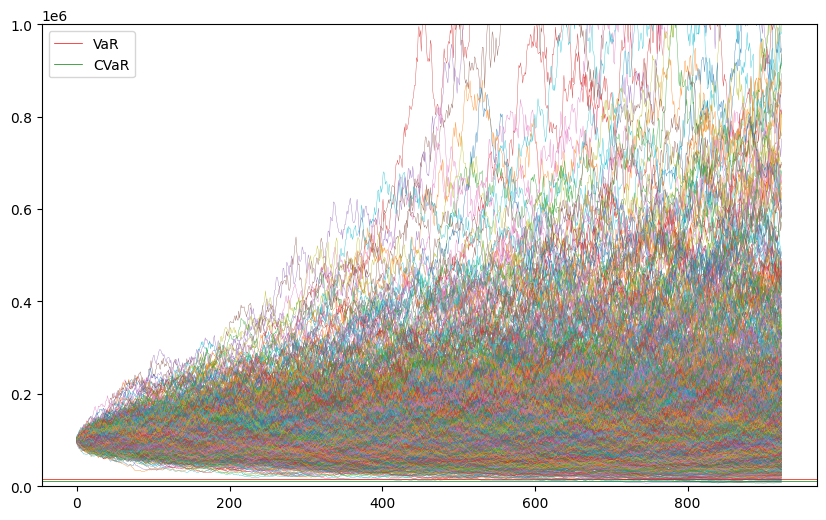

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Charger les données historiques de BTC
data = yf.download('BTC-USD', start="2022-01-01")
data['returns'] = data['Close'].pct_change()

# Calculer la moyenne et l'écart type des rendements quotidiens
daily_returns = data['returns'].dropna()
mean_return = daily_returns.mean()
std_return = daily_returns.std()

# Configurer la simulation de Monte Carlo
simulations = 1000
days = len(data.index)
initial_capital = 100_000

portfolio = np.zeros((days, simulations))

# Exécuter la simulation
for i in range(simulations):
    daily_returns_sim = np.random.normal(mean_return, std_return, days)
    portfolio[:, i] = np.cumprod(daily_returns_sim + 1) * initial_capital

simulated_portfolio = pd.DataFrame(portfolio)

# Analyser les résultats
alpha = 1

def montecarlo_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]
    return np.percentile(sim_val, alpha)

def conditional_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]
    return sim_val[sim_val <= montecarlo_var(alpha)].mean()

mc_var = montecarlo_var(alpha)
cond_var = conditional_var(alpha)

# Désactiver l'affichage des DataFrames et afficher le graphique uniquement
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(simulated_portfolio.index, simulated_portfolio.iloc[:, i], lw=0.25)

plt.axhline(mc_var, lw=0.5, c='r', label='VaR')
plt.axhline(cond_var, lw=0.5, c='g', label='CVaR')
plt.ylim(0, 1_000_000)
plt.legend()
plt.show()


# **Code Explanation**
**Data Loading:** We use yfinance to download historical Bitcoin (BTC) data.

**Statistics Calculation:** We calculate the average and standard deviation of daily returns.
### **Monte Carlo Simulation:**
We configure the parameters of the simulation, such as the number of simulations, the number of days, and the initial capital.
For each simulation, we generate random daily returns based on the historical mean and standard deviation.
We calculate the cumulative value of the portfolio for each simulation.

**Calculation of VaR and CVaR:**
VaR is calculated as the percentile of the worst 5% outcomes (95% confidence level).
The CVaR is the average of the values that are worse than the VaR.

**Visualisation:** We display the different simulated portfolio trajectories as well as the VaR and CVaR lines on a graph.
This code provides a simple and practical illustration of the use of Monte Carlo simulation to assess the risk of a Bitcoin investment portfolio.

Conclusion and interpretation of the chart
The graph shows the simulated trajectories of the value of a portfolio containing only Bitcoin (BTC) over a given period.

Interpretation of the axes

X-axis: represents the number of simulated trading days.
Y-axis: represents the value of the portfolio in dollars.
Interpretation of Trajectories

Each coloured line represents a simulation of the portfolio's value. The diversity of the lines shows the variability and risk associated with BTC returns.

Value at Risk (VaR)

The horizontal red line indicates the VaR, i.e. the maximum loss expected with a confidence level of 99%. This means that there is a 1% chance that the loss will be greater than this value.

Conditional Value at Risk (CVaR)

The horizontal green line indicates the CVaR, which is the average expected loss in excess of the VaR. This gives a more pessimistic idea of the loss in the event of an extreme scenario.

Conclusion
This chart shows the risks associated with investing in BTC. The VaR and CVaR lines provide key indicators for assessing potential losses, helping to make informed portfolio management decisions.

